# Second layer analysis: From tabular data to graph

By [Serena Bonaretti](https://sbonaretti.github.io/), 2022  
Notebook license: CC-BY   
Code license: GNU-GPL-3.0  

---

- In this notebook you will learn about:   
  [1. Reading tabular data using Pandas](#readingdata)  
  [2. Creating a scatter plot using Matplotlib](#scatterplot)    
  [3. Computing $r^2$ and regression coefficients](#regressionline)    
  [4. Specifying code dependencies](#dependencies)  
  [5. More: Several ways to do the same thing...](#samesamebutdifferent)

- We will recreate Figure 5 of the paper [Computational finite element bone mechanics accurately predicts mechanical competence in the human radius of an elderly population](https://www.sciencedirect.com/science/article/abs/pii/S8756328211000743?via%3Dihub) by Muller et al., 2011 (find paper in the folder *Material*)


<img src="./material/2011_Mueller_figure5.png" width="400">

- Data are in the file *2011_Mueller_data.csv* 
- `.csv` is the open source version of Excel, therefore it does not need a Microsoft license to be opened and saved  
- *Note:* the data are not exactly the ones from the paper, but an estimate. Thus, graphs and equation will be slightly different


- Aim: You can use this notebook as the base for second layer analysis for your studies. You can then attach the modified notebooks to your publications

---
<a name="readingdata"></a>

## 1. Reading tabular data using Pandas 



- To manipulate tabular data, we usually use the Python package Pandas
  - Pandas documentation: [here](https://pandas.pydata.org/)
  - Pandas cheat sheet: [here](https://drive.google.com/file/d/1UHK8wtWbADvHKXFC937IS6MTnlSZC_zB/view)

- Import Pandas:

In [1]:
import pandas as pd

- Read the data using `pd.read_csv(file_name)`:  

In [2]:
df = pd.read_csv("./material/2011_Mueller_data.csv")
df

,Sample ID,Bone strength VOI 1,Bone strength VOI FB
0,1,2374.311034,2376.174876
1,2,1404.501021,1199.956436
2,3,2149.930663,1993.887526
3,4,5462.268762,4495.986099
4,5,4039.654751,3450.900883
...,...,...,...
95,96,5430.858441,4622.977607
96,97,5398.193111,4818.038320
97,98,3023.814568,2926.792956
98,99,3717.323053,3169.013558


- Notes:
  - In Pandas, tables are called DataFrames and are usually named as `df` or a variation of it (e.g. `df_radius`) 
  - Row numbers start from `0`
  - In Pandas, data should always be organized this way:
    - Rows represent observations (or samples, subjects, etc.) 
    - Columns represents features (or measurements, characteristics, labels, etc.)
  

--- 

<a name = "scatterplot"></a>
## 2. Creating a scatter plot using Matplotlib 

- To create plots, we usually use the Python package Matplotlib
  - Matplotlib documentation: [here](https://matplotlib.org/)  
  - Matplotlib cheat sheets: [here](https://matplotlib.org/cheatsheets/)


- Note: Matplotlib is the basis of several other data visualization packages, such as: 
  - [Seaborn](https://seaborn.pydata.org/): for statistical data visualization  
  - [Bokeh](https://bokeh.org/): with interactive widgets for Jupyter Nb
  - [Altair](https://altair-viz.github.io/): for declarative data visualization (e.g. follows the principles of the [Grammar of Graphics](https://link.springer.com/book/10.1007/0-387-28695-0), similarly to [ggplot2](https://ggplot2.tidyverse.org/index.html) in R)

- Import Matplotlib:  
  *Note*: usually imports are all declared in a cell at the top of the Nb. Here, we import in various sections of the Nb for demonstrational purposes

In [3]:
import matplotlib.pyplot as plt

- Define `x` and `y`:

In [4]:
x = df ["Bone strength VOI 1"]
y = df ["Bone strength VOI FB"]

- Create the scatter plot using `plt.scatter(x,y)`:

In [5]:
list(range(0,6001,1000))

[0, 1000, 2000, 3000, 4000, 5000, 6000]

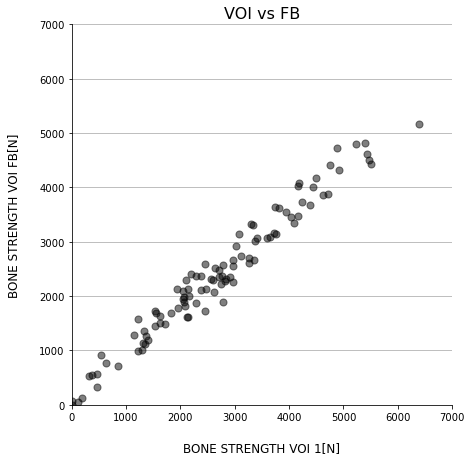

In [6]:
# font size
my_fontsize = 12

# figure size
plt.figure(figsize = (7,7))

# plotting
plt.scatter(x,y, 
           c = "black", alpha = 0.5,
           s = 50, marker ="o")

# axes
plt.axis("square")
plt.xticks(list(range(0, 7001, 1000))) 
plt.yticks(list(range(0, 7001, 1000)))
plt.xlim([0, 7001])
plt.ylim([0, 7001])
plt.xlabel("\nBONE STRENGTH VOI 1[N]", fontsize=my_fontsize)
plt.ylabel("BONE STRENGTH VOI FB[N]\n", fontsize=my_fontsize)

# add grid in y direction
plt.grid(axis = "y")
# put grid under markers
axes = plt.gca()
axes.set_axisbelow(True)
# removing top and right black axes
obg = axes.spines[["right", "top"]]
obg.set_visible(False)

# save figure
plt.savefig("./material/fig.png")

# title
plt.title("VOI vs FB", fontsize = my_fontsize + 4)

# show plot
plt.show()

- Show plot: 
  - Remove the text above the plot with `plt.show()`
  
- Markers:
  - *Color:* To change marker color, use the parameter `c` in `plt.scatter()`. Find a list of colors in Matplotlib [here](https://matplotlib.org/stable/gallery/color/named_colors.html).    
    If you want to add transparency, use the parameter `alpha` with a value between 0 and 1 
  - *Size*: To change marker size, use the parameter `s` in `plt.scatter()`
  - *Shape*: To change maker shape, use the parameter `marker` in `plt.scatter()`. Find a list of marker shapes [here](https://matplotlib.org/stable/api/markers_api.html)
  
  
- Axes:
  - *Ticks*: To determine axis ticks, use `.xticks([ , , , ...])` and `.yticks([ , , , ...])`  
  - *Limits*: To determine axis limits, use `.xlim([ , ])` and `.ylim([ , ])` 
  - *Characteristics*: To determine axis characteristics, use `plt.axis()`. Find a list of characteristics [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.axis.html)    
    For squared axes, use `"square"`
  - *Labels*: To add axis labels, use `.xlabel(" ")` and `.ylabel(" ")`    
    To change font size, use the parameter `fontsize` 
  - *Grid*: To add a grid, use `plt.grid()`. To specify only *y* grid, add the parameter `axis="y"`.    
    To send the grid behind the markers, use the following commands: `axes = plt.gca()`, `axes.set_axisbelow(True)`    
    
- Figure: 
  - *Creating*: To create a figure to manipulate, use the command `plt.figure()` at the very beginning. Some parameters are: 
    - *Size*: To change a figure size, use the parameter `figsize` 
    - *Color*: To change a figure color, use the parameter `facecolor`
  - *Save*: To save a figure, use the command `plt.savefig()`. To define the resolution, use the parameter `dpi`

Other properties: 
- Title:
  - To add a figure title, use `plt.title()` 
- Legend:
  - To add a legend:
    - Add the parameter `label` in `plt.scatter()` 
    - Type the command `plt.legend()`. For legend properties (e.g. `loc`), see [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html)


<a name = "regressionline"></a>

--- 

## 3. Computing $r^2$ and regression coefficients

- To calculate $r^2$ and the regression coefficients `m`(slope) and `b`(intercept), we use the Python package Scipy
  - SciPy documentation [here](https://scipy.org/)

- From the `stats` module of SciPy import [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html):

In [7]:
from scipy.stats import linregress

- Use the `linregress(x,y)` to compute the parameters:

In [8]:
results = linregress(x,y)
results

LinregressResult(slope=0.8385848273083347, intercept=155.18361127471053, rvalue=0.981756702665025, pvalue=1.8305536280925133e-72, stderr=0.016406159280986165, intercept_stderr=49.848825254012986)

In [9]:
m = results.slope
print (round(m,1))
b = results.intercept
print (int(b))
r = results.rvalue
print (round(r,2))
r2 = r**2
print (round(r2,2))

0.8
155
0.98
0.96


- To add the regression line, we need to create the new `y` for the smallest and largest `x`:

In [10]:
x_min = x.min()
print (x_min)

x_max = x.max()
print (x_max)

y_min = m * x_min + b
y_max = m * x_max + b
print (y_min)
print (y_max)

0.0
6386.037031
155.18361127471053
5510.417372100476


- Add regression line and annotation to the graph:

y = 0.8x + 155
$r^2$ = 0.96


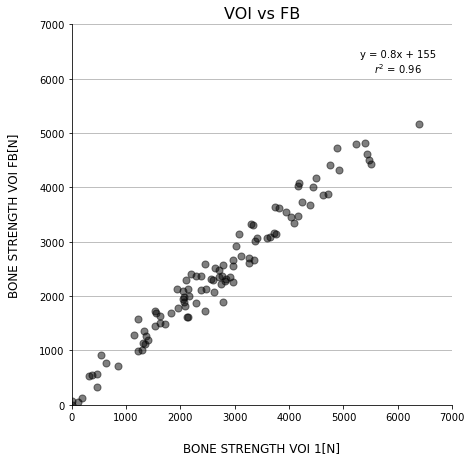

In [11]:
# font size
my_fontsize = 12

# figure size
plt.figure(figsize = (7,7))

# plotting
plt.scatter(x,y, 
           c = "black", alpha = 0.5,
           s = 50, marker ="o")

# axes
plt.axis("square")
plt.xticks(list(range(0, 7001, 1000))) 
plt.yticks(list(range(0, 7001, 1000)))
plt.xlim([0, 7001])
plt.ylim([0, 7001])
plt.xlabel("\nBONE STRENGTH VOI 1[N]", fontsize=my_fontsize)
plt.ylabel("BONE STRENGTH VOI FB[N]\n", fontsize=my_fontsize)

# add grid in y direction
plt.grid(axis = "y")
# put grid under markers
axes = plt.gca()
axes.set_axisbelow(True)
# removing top and right black axes
obg = axes.spines[["right", "top"]]
obg.set_visible(False)

# save figure
plt.savefig("./material/fig.png")

# title
plt.title("VOI vs FB", fontsize = my_fontsize + 4)

# annotations
annotation = "y = " + str(round(m,1)) + "x + " + str(int(b)) + "\n$r^2$" + " = " + str(round(r2,2))
print (annotation)
plt.annotate(annotation, xy = [6000, 6100], ha = "center")

# show plot
plt.show()

- Annotations:
  - To add an annotation, use `plt.annotate()`. Find the list of parameters [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.annotate.html)  
    - To position the text, use `xy`  
    - For horizontal alignment, use `ha`. Possible values: `left`, `center`, `right`  
    - For vertical alignment, use  `va`. Possible values: `top`, `center`, `bottom` 
- Plotting a line:  
  - To plot a line, use `plt.plot()`. Find the list of parameters [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)  
    - For a dashed line, assign `dashed` to the parameter `linestyle` 

---
<a name="dependencies"></a>

## 4. Specifying code dependencies

- Dependencies are software versions 
- They are fundamental for reproducibility, to avoid issues due to package updates
- To print out dependencies, we use the Jupyter extension [watermark](https://github.com/rasbt/watermark)

- Install *watermark* using the command `pip install watermark` (use a terminal or a cell)

- Use the following commands to print out your code dependencies:  
  - `%load_ext watermark`: to load the extension 
  - `%watermark`: to print out your computer characteristics  
  - `%watermark --iversions`: to print out the versions of the used packages
  

In [12]:
%load_ext watermark
%watermark
%watermark --iversions

Last updated: 2022-06-23T17:54:49.843742+02:00

Python implementation: CPython
Python version       : 3.9.7
IPython version      : 7.29.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 21.1.0
Machine     : x86_64
Processor   : i386
CPU cores   : 8
Architecture: 64bit

matplotlib: 3.4.3
pandas    : 1.3.4



---
---

<a name="samesamebutdifferent"></a>

## 5. More: Several ways to do the same thing...

- In Python there are often redundancies because of its open source nature 
- As an example, let's see 2 ways to calculate regression and coefficient of determination  
  [1. Using SciPy (engineering prospective)](#scipy)  
  [2. Using Scikit-learn (machine learning prospective)](#sklearn)  

<a name="scipy"></a>

### 5.1 Calculating $r^2$, `m`, and `b` using SciPy

- Data preparation:

In [13]:
# all data
x = df["Bone strength VOI 1"]
y = df["Bone strength VOI FB"]

# x min and max to plot regression line
x_min = x.min()
x_max = x.max()

- Compute statistics:

In [14]:
from scipy.stats import linregress

# calculate regression
result = linregress(x, y)

# get parameters
m = result.slope
b = result.intercept
r = result.rvalue
r2 = r**2
print ("slope:", round(m, 2))
print ("intercept:", int(b))
print ("r2:", round(r2, 2))

# calculate new y's on the regression line
y_min = m*x_min + b
y_max = m*x_max + b
print ("y_min:", round(y_min, 2))
print ("y_max:", round(y_max, 2))

slope: 0.84
intercept: 155
r2: 0.96
y_min: 155.18
y_max: 5510.42


<a name="sklearn"></a>

### 5.2 Calculating $r^2$, `m`, and `b` using Scikit-learn

- Data preparation:

In [15]:
import numpy as np

# transform data types
x = df["Bone strength VOI 1"].values.reshape(-1, 1) 
y = df["Bone strength VOI FB"].values.reshape(-1, 1)  
# alternative
x = df[["Bone strength VOI 1"]]
print (x)

# x min and max to plot regression line
x_min_max = np.array([x_min, x_max]).reshape(-1,1)

    Bone strength VOI 1
0           2374.311034
1           1404.501021
2           2149.930663
3           5462.268762
4           4039.654751
..                  ...
95          5430.858441
96          5398.193111
97          3023.814568
98          3717.323053
99          2138.452450

[100 rows x 1 columns]


In [16]:
df["Bone strength VOI 1"].values.shape

(100,)

In [17]:
df["Bone strength VOI 1"].values.reshape(-1,1).shape

(100, 1)

In [18]:
import numpy as np
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression


# calculate regression
lr = LinearRegression()
lr.fit(x,y)
# get parameters
m = lr.coef_
b = lr.intercept_
# make parameter scalar
m = m[0][0]
b = b[0]
# calculate r2
r2 = r2_score(x,y)
print ("slope:", round(m, 2))
print ("intercept:", int(b))
print ("r2:", round(r2, 2))

# calculate new y's on the regression line
y_pred = lr.predict(x_min_max)
y_min = y_pred[0][0]
y_max = y_pred[1][0]
print ("y_min:", round(y_min, 2))
print ("y_max:", round(y_max, 2))

slope: 0.84
intercept: 155
r2: 0.91
y_min: 155.18
y_max: 5510.42


- *Note*: $r^2$ is slightly different between the two methods because it's calculated in two different ways(see [this blog](https://stackoverflow.com/questions/50123230/coefficient-of-determination-is-different-between-scikit-learn-and-scipy-librari))